   # Group 5
### Ozodbek Ozodov, Nargiz Ahmadova, Neda Mohamadi

# Exercise 1

### Data generating process

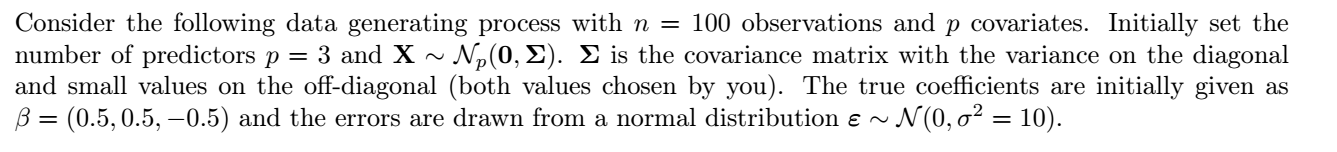

##### Let's start with cleaning the environment and installing\loading necessary packages

In [159]:
rm(list=ls())
library(glmnet)
library(ggplot2)
library(MASS)
library(ggplot2)
#install.packages("ggrepel")
library(dplyr)

In [162]:
### Variance-covariance matrix

Var1=4
Var2=7
Var3=16
Corr12=0.01
Corr13=0.50
Corr23=0.05

Cov12=Corr12*sqrt(Var1)*sqrt(Var2)
Cov13=Corr13*sqrt(Var1)*sqrt(Var3)
Cov23=Corr23*sqrt(Var2)*sqrt(Var3)
Variance.cov=matrix(c(Var1,Cov12,Cov13,Cov12,Var2,Cov23,Cov13,Cov23,Var3),nrow=3,ncol=3,byrow=TRUE)
#Variance.cov



### After we chose variance and correlation coefficients, we created the following variance-covariance matrix. This will be used in the data generating process to create multivariate normal distribution

In [163]:
Variance.cov

4.00000000,0.05291503,4.0000000
0.05291503,7.00000000,0.5291503
4.00000000,0.52915026,16.0000000


In [169]:
### data generating process
set.seed(123)
beta=c(0.5,0.5,-0.5)
n=100
p=3 ## number of covariates
mydata=function(n,mu,VarCov, mu.u,sigma.u){
  
  x=mvrnorm(n,mu,VarCov)
  error=rnorm(n, mu.u, sqrt(sigma.u))
  y=x%*%beta+error
  data=cbind(x,y)
  return(data)
}

data=mydata(n=100,mu=rep(0,3),VarCov=Variance.cov,mu.u=0, sigma.u=10)
colnames(data)=c("X1", "X2", "X3", "Y")
head(data)

X=data[,-4]
Y=data[,4]


X1,X2,X3,Y
4.1118709,2.0816116,1.0800196,0.2949371
2.3977027,-0.5751332,0.3052959,-1.6215747
-2.3189056,0.3102643,-6.0849860,-0.9297476
0.7476540,0.9237529,-0.5814913,-2.2018901
-0.9127239,2.4651476,-0.4167899,-0.3978130
-2.8232851,-0.2631896,-6.5810112,2.7945488


## a) Write a function to calculate the ridge regression estimator in closed form (depending on λ) as discussed in the lecture.

### As we discussed, the derived equation for calculating ridge regression looks like the following:


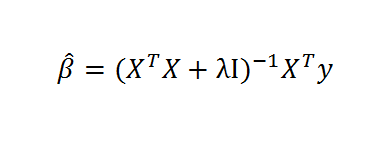

In [170]:
### ridge regression as a function of lambda, X and Y based on the formula: (X'X+\Lambda I)X'Y

ridge.mod=function(lambda,X,Y){
  solve(t(X)%*%X+lambda*diag(3))%*%t(X)%*%Y
}


# b) ridge coefficient estimates for each value of lambda

In [171]:
grid <- c(0, 10^ seq (-2, 4, length = 99))

In [172]:
grid[c(1,10:20,100)]

[1] 0.000000e+00 3.088844e-02 3.556480e-02 4.094915e-02 4.714866e-02
 [6] 5.428675e-02 6.250552e-02 7.196857e-02 8.286428e-02 9.540955e-02
[11] 1.098541e-01 1.264855e-01 1.000000e+04

In [174]:
ridge.coef=matrix(rep(NA,p*length(grid)),nrow=3,ncol=length(grid))
for (i in 1:length(grid)){
  ridge.coef[,i]=ridge.mod(lambda=grid[i],X=X,Y=Y)
}
colnames(ridge.coef) <- c("OLS", round(grid[2:100],3))
ridge.coef


OLS,0.01,0.012,0.013,0.015,0.018,0.02,0.023,0.027,0.031,...,2811.769,3237.458,3727.594,4291.934,4941.713,5689.866,6551.286,7543.12,8685.114,10000
0.4057636,0.4057440,0.4057410,0.4057376,0.4057337,0.4057292,0.4057240,0.4057180,0.4057111,0.4057031,...,0.008404349,0.006386771,0.004776621,0.003506226,0.002515583,0.001752494,0.001172332,0.0007375474,0.0004169993,0.000185211
0.4416489,0.4416417,0.4416407,0.4416394,0.4416380,0.4416363,0.4416344,0.4416322,0.4416297,0.4416268,...,0.082060966,0.073093695,0.064926397,0.057526663,0.050854240,0.044863503,0.039505608,0.0347303130,0.0304874442,0.026728027
-0.4223815,-0.4223725,-0.4223711,-0.4223695,-0.4223677,-0.4223657,-0.4223633,-0.4223605,-0.4223573,-0.4223536,...,-0.097139950,-0.087879201,-0.079208351,-0.071143344,-0.063689215,-0.056840926,-0.050584592,-0.0448989408,-0.0397568764,-0.035127029


 The output of manually-created function consists of 3 rows and 100 columns. They represent the coefficient estimates for all three covariates across lambdas from 0 to 100

In [141]:
#head(ridge.coef)



OLS,0.01,0.012,0.013,0.015,0.018,0.02,0.023,0.027,0.031,...,2811.769,3237.458,3727.594,4291.934,4941.713,5689.866,6551.286,7543.12,8685.114,10000
0.4057636,0.4057440,0.4057410,0.4057376,0.4057337,0.4057292,0.4057240,0.4057180,0.4057111,0.4057031,...,0.008404349,0.006386771,0.004776621,0.003506226,0.002515583,0.001752494,0.001172332,0.0007375474,0.0004169993,0.000185211
0.4416489,0.4416417,0.4416407,0.4416394,0.4416380,0.4416363,0.4416344,0.4416322,0.4416297,0.4416268,...,0.082060966,0.073093695,0.064926397,0.057526663,0.050854240,0.044863503,0.039505608,0.0347303130,0.0304874442,0.026728027
-0.4223815,-0.4223725,-0.4223711,-0.4223695,-0.4223677,-0.4223657,-0.4223633,-0.4223605,-0.4223573,-0.4223536,...,-0.097139950,-0.087879201,-0.079208351,-0.071143344,-0.063689215,-0.056840926,-0.050584592,-0.0448989408,-0.0397568764,-0.035127029


The plot shows the coefficient estimates for all three betas derived from ridge.mode user-defined function.   

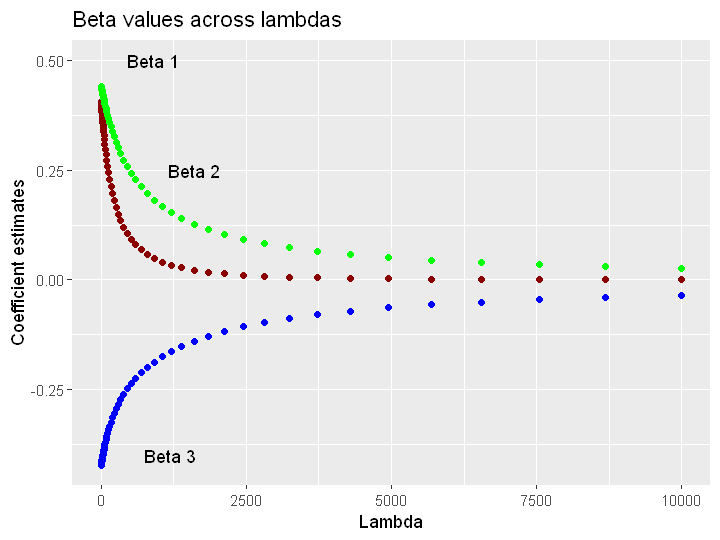

In [142]:
df=data.frame("lambda"=grid, "beta1"=ridge.coef[1,],"beta2"=ridge.coef[2,],"beta3"=ridge.coef[3,])



ggp <- ggplot(df, aes(x=lambda) ) + 
  geom_point(aes(y = beta1), color = "darkred") + 
  geom_point(aes(y = beta2),color="green" ) +
  geom_point(aes(y = beta3), color="blue") #+
#   geom_line(aes(y = beta1), color = "darkred") + 
#   geom_line(aes(y = beta2),color="green" ) +
#   geom_line(aes(y = beta3), color="blue")
  
ggp +  annotate("text", x=900, y=0.50, label="Beta 1")+
        annotate("text", x=1600, y=0.25, label="Beta 2")+
        annotate("text", x=1200, y=-0.40, label="Beta 3")+
ggtitle("Beta values across lambdas")+
xlab("Lambda")+
ylab("Coefficient estimates")+theme_grey()

#options(repr.plot.width=4, repr.plot.height=3)


      
  

In [143]:
#### Side note: glmnet package versus closed form solution
grid.new=10^ seq (4, -2, length = 100)
ridge=glmnet(X,Y,alpha=0,lambda=grid.new)



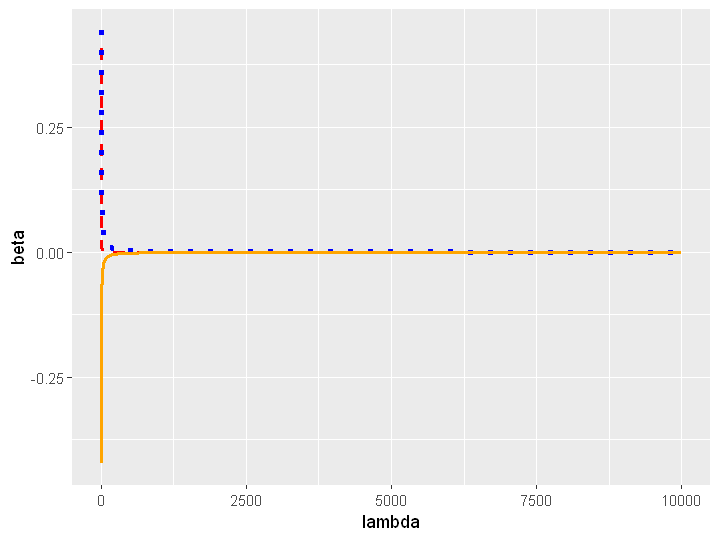

In [144]:

df=data.frame("lambda"=grid.new, "beta1"=coef(ridge)[2,],"beta2"=coef(ridge)[3,],"beta3"=coef(ridge)[4,])
ggplot(df, aes(x=lambda,y=beta)) + 
  geom_line(aes(y = beta1),linetype="dashed",color = "red", size=1)+ 
  geom_line(aes(y = beta2),linetype="dotted",color = "blue",size=1.5)+
  geom_line(aes(y = beta3),color = "orange",size=1)+
  theme_grey()
  options(repr.plot.width=6, repr.plot.height=4.5)

In [145]:
#### some adjustments to glmnet function to get similar results
sd_y <- sqrt(var(Y)*(n-1)/n)
grid.new <- (sqrt(sd_y)/100)* 10^seq (4, -2, length = 100)   ### lambda is adjusted
ridge.glm <- glmnet (X, Y, alpha = 0, lambda = grid.new, standardize=FALSE,intercept=FALSE) 


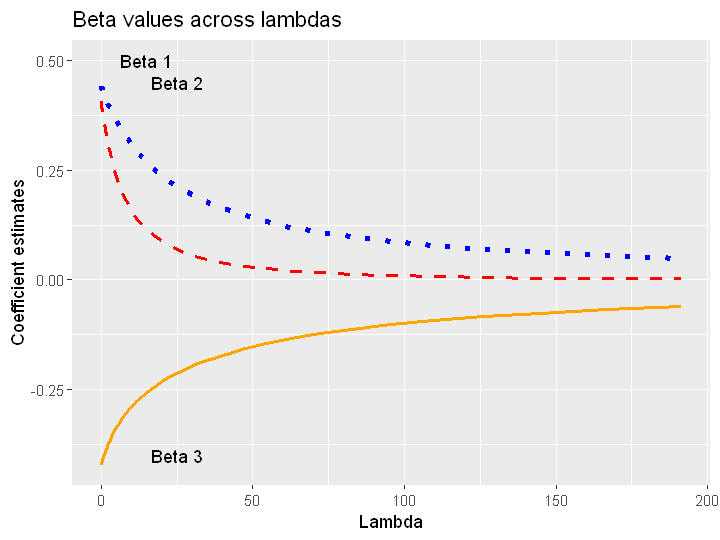

In [146]:

df=data.frame("lambda"=grid.new, "beta1"=coef(ridge.glm)[2,],"beta2"=coef(ridge.glm)[3,],"beta3"=coef(ridge.glm)[4,])
ggplot(df, aes(x=lambda,y=beta)) + 
  geom_line(aes(y = beta1),linetype="dashed",color = "red", size=1)+ 
  geom_line(aes(y = beta2),linetype="dotted",color = "blue",size=1.5)+
  geom_line(aes(y = beta3),color = "orange",size=1)+
    annotate("text", x=15, y=0.50, label="Beta 1")+
        annotate("text", x=25, y=0.45, label="Beta 2")+
        annotate("text", x=25, y=-0.40, label="Beta 3")+
ggtitle("Beta values across lambdas")+
xlab("Lambda")+
ylab("Coefficient estimates")
    
  



### c) Generating training and test samples, prediction and training errors for lambdas and the OLS estimate

To create the subset for training data we split the data into two equal subsets by creating random vector. Elements corresponding TRUE values are the training data, and FALSE are the test data.

In [155]:

# set.seed(12)
train=sample(1:nrow(X),nrow(X)/2)
test=-train
Y.test=Y[test]
# Storage for training ridge coefficients for each lambda
ridge.coef.train=matrix(rep(NA,p*length(grid)),nrow=3,ncol=length(grid))

for (i in 1:length(grid)){
  ridge.coef.train[,i]=ridge.mod(lambda=grid[i],X=X[train,],Y=Y[train])
}
# Storage for both errors for each lambdas
prediction.error=c(rep(NA,length(grid)))
training.error=c(rep(NA,length(grid)))

# calculating errors for each lambda
for (i in 1:length(grid)){
  prediction.error[i]=mean((Y.test-X[test,]%*%ridge.coef.train[,i])^2)
  training.error[i]=mean((Y[train]-X[train,]%*%ridge.coef.train[,i])^2)
}


# prediction.error
# training.error


### Prediction and training error

In [157]:
min(prediction.error)
which(prediction.error==min(prediction.error))

[1] 14.21922

[1] 1

[1] "Prediction error"


[1] 14.21922

[1] "Lambda index containing minimum error for"


[1] 1

[1] "Lambda value for minimum prediction error"


[1] 0

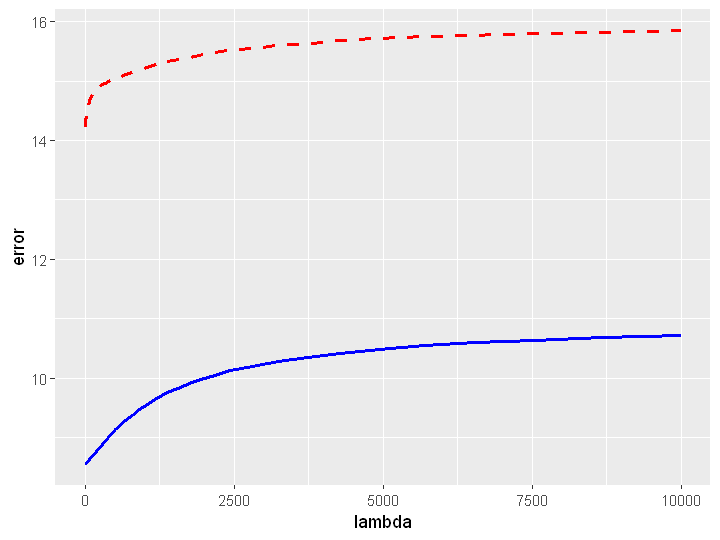

In [158]:
print("Prediction error") 
min(prediction.error)
### index corresponding to the minimum prediction error
print("Lambda index containing minimum error for")
which(prediction.error==min(prediction.error))
#### lambda corresponding to the minimum prediction error
print("Lambda value for minimum prediction error")
grid[which(prediction.error==min(prediction.error))]

#x.axis=seq(0, 10000)
plot_data=data.frame("prediction.error"=prediction.error, "training.error"=training.error) #, x.axis="x.axis")



data.f=data.frame("lambda"=grid, "test.error"=prediction.error,"train.error"=training.error)
ggplot(data.f, aes(x=lambda,y=error, color=data.f)) + 
  geom_line(aes(y = test.error),linetype="dashed", color = "red", size=1)+ 
  geom_line(aes(y = train.error),color = "blue", size=1)+ 
  theme_grey()

# annotate("text", x=12, y=12, label="  Prediction error")+
# annotate("text", x=12, y=8.7, label=" Training error")+ 
# ggtitle(" Prediction and training errors")+
# xlab("Lambda")+ylab("Error") 

  
#   options(repr.plot.width=6, repr.plot.height=4.5)


### d) Replaceing one of the covariates with a constant equal to -10

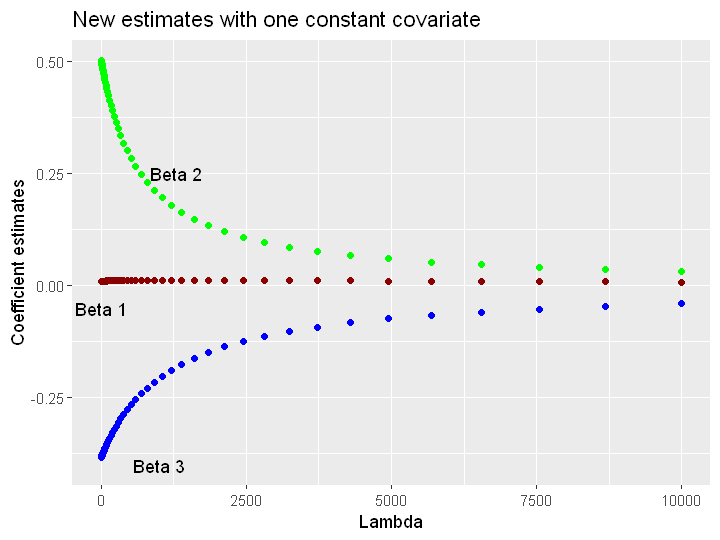

In [127]:
x.new=X
x.new[,1]=rep(-10,n)


ridge.coef.new=matrix(rep(NA,3*length(grid)),nrow=3,ncol=length(grid))


for (i in 1:length(grid)){
  ridge.coef.new[,i]=ridge.mod(lambda=grid[i],X=x.new,Y=Y)
}


df=data.frame("lambda"=grid, "beta1"=ridge.coef.new[1,],"beta2"=ridge.coef.new[2,],"beta3"=ridge.coef.new[3,])
ggplot(df, aes(x=lambda)) + 
  geom_point(aes(y = beta1), color = "darkred") + 
  geom_point(aes(y = beta2),color="green" ) +
  geom_point(aes(y = beta3), color="blue") + annotate("text", x=0, y= -0.05, label="Beta 1")+
        annotate("text", x=1300, y=0.25, label="Beta 2")+
        annotate("text", x=1000, y=-0.40, label="Beta 3")+
ggtitle("New estimates with one constant covariate")+
xlab("Lambda")+
ylab("Coefficient estimates") 
        
  





### As we can see, constant covariate has zero effect across all the lambda values. To illustrate in example, consider using a ZIP Postal code of the each person in the sample, and this sample is set up from poeple living in the same town. In this case, Postal code is basically useless, and it does not say anything about the regression model neither in OLS, nor in the ridge regression case.

### e) Determining the optimal lambda from a 10-fold cross-validation using glmnet

In [128]:
## ridge model, using internal commands to perform 10 fold cross validation

set.seed(12)
library(glmnet)
cv.out <- cv.glmnet(X,Y,alpha = 0)
bestlam <- cv.out$lambda.min
bestlam
cv.out

[1] 0.1289706


Call:  cv.glmnet(x = X, y = Y, alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min  0.129   100   9.777 1.582       3
1se  5.849    59  11.312 1.144       3

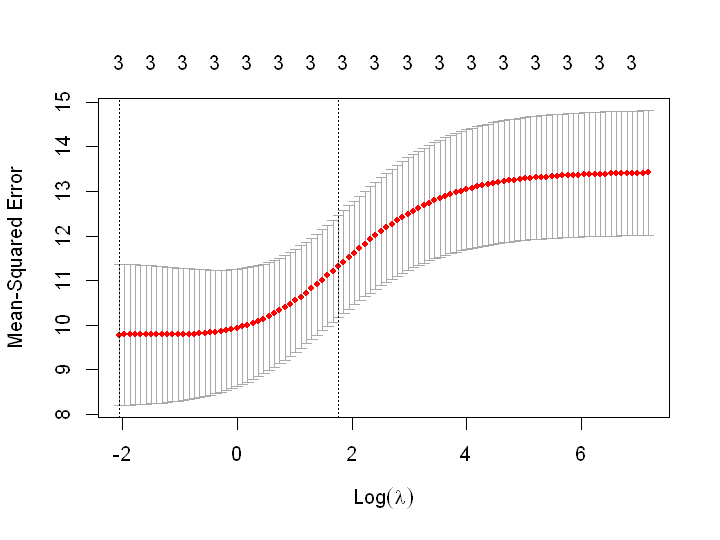

In [129]:
 plot(cv.out)


In [130]:
# plot(ridge.glm, xvar = "lambda")
# options(repr.plot.width=4, repr.plot.height=3)



# Exercise 2
# Simulation Study

In [131]:
### Exercise 2 
### Part a

set.seed(12)
rep=100
### setting storage
pred.error=matrix(rep(NA,rep*length(grid)),nrow=rep,ncol=length(grid))
prediction.error=c(rep(NA,length(grid)))
ridge.coef.train=matrix(rep(NA,p*length(grid)),nrow=3,ncol=length(grid))


simulation=function(VarCov){
for (i in 1:rep){
  data=mydata(n=100,mu=rep(0,3),VarCov,mu.u=0, sigma.u=10)
  X=data[,-4]
  Y=data[,4]
  train=sample(1:nrow(X),nrow(X)/2)
  test=-train
  Y.test=Y[test]
  for (a in 1:length(grid)){
    ridge.coef.train[,a]=ridge.mod(lambda=grid[a],X=X[train,],Y=Y[train])
  }
  for (b in 1:length(grid)){
    prediction.error[b]=mean((Y.test-X[test,]%*%ridge.coef.train[,b])^2)
  }
  pred.error[i,]=prediction.error
  
}
  return(pred.error)
}

In [132]:
test.error=simulation(VarCov=Variance.cov)
head(test.error)
dim(test.error)


10.253341,10.253413,10.253424,10.253436,10.253450,10.253467,10.253486,10.253508,10.253533,10.253563,...,13.66371,13.75893,13.84625,13.92585,13.99801,14.06310,14.12157,14.17388,14.22050,14.26193
11.143236,11.143119,11.143102,11.143081,11.143058,11.143031,11.143000,11.142965,11.142923,11.142876,...,13.49143,13.56636,13.63422,13.69540,13.75034,13.79951,13.84336,13.88236,13.91695,13.94754
8.035522,8.035535,8.035537,8.035539,8.035541,8.035544,8.035548,8.035552,8.035556,8.035562,...,12.00930,12.11154,12.20612,12.29305,12.37249,12.44470,12.51001,12.56883,12.62157,12.66869
10.759549,10.759502,10.759495,10.759486,10.759477,10.759466,10.759454,10.759439,10.759423,10.759404,...,15.91576,16.06392,16.20004,16.32444,16.43754,16.53988,16.63210,16.71486,16.78886,16.85480
11.674299,11.674129,11.674103,11.674073,11.674039,11.674000,11.673955,11.673902,11.673842,11.673773,...,12.91425,12.97521,13.03073,13.08104,13.12642,13.16718,13.20365,13.23617,13.26509,13.29072
9.339361,9.339387,9.339391,9.339395,9.339400,9.339406,9.339413,9.339420,9.339429,9.339440,...,11.28283,11.33534,11.38371,11.42802,11.46838,11.50497,11.53798,11.56764,11.59419,11.61787


[1] 100 100

[1] 60

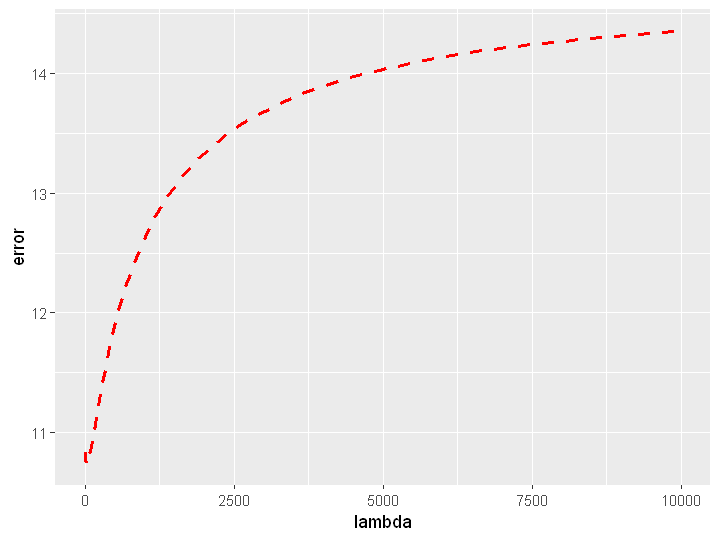

In [133]:
mean.test.error=colMeans(test.error)
which(mean.test.error==min(mean.test.error))
data.f=data.frame("lambda"=grid, "test.error"=mean.test.error)
ggplot(data.f, aes(x=lambda,y=error)) + 
  geom_line(aes(y = test.error),linetype="dashed", color = "red", size=1)+ 
  theme_grey()

In [134]:
Var1=4
Var2=9
Var3=16
Corr12=0.8
Corr13=0.85
Corr23=0.90

Cov12=Corr12*sqrt(Var1)*sqrt(Var2)
Cov13=Corr13*sqrt(Var1)*sqrt(Var3)
Cov23=Corr23*sqrt(Var2)*sqrt(Var3)
Variance.cov.new=matrix(c(Var1,Cov12,Cov13,Cov12,Var2,Cov23,Cov13,Cov23,Var3),nrow=3,ncol=3,byrow=TRUE)
mean.pred.error.new=simulation(VarCov=Variance.cov.new)
which(colMeans(mean.pred.error.new)==min(colMeans(mean.pred.error.new)))

[1] 60

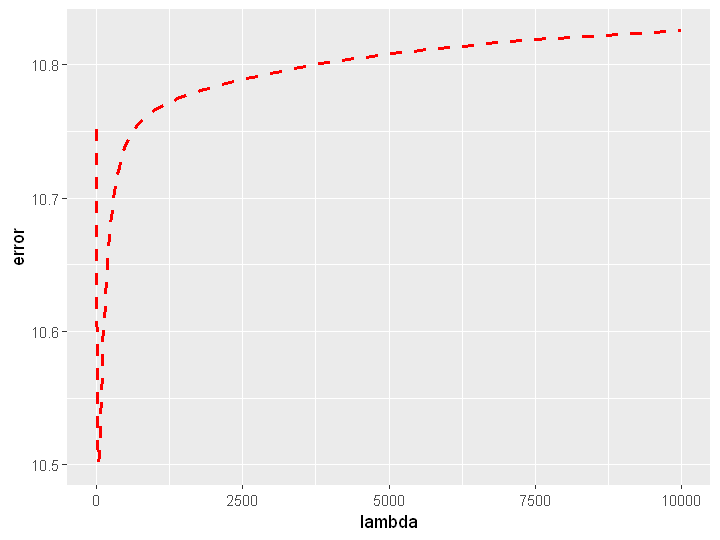

In [135]:

data.f=data.frame("lambda"=grid, "test.error"=colMeans(mean.pred.error.new))
ggplot(data.f, aes(x=lambda,y=error)) + 
  geom_line(aes(y = test.error),linetype="dashed", color = "red", size=1)+ 
  scale_x_continuous(limits=c(0, grid[100]))+
  theme_grey()

### After we set the new, higher correlation coefficients in the data generating process, we can see that the OLS case ( Lambda=0) does not provide the best solution. Correlated variables are penalized in lambda=   case.


### As an example, consider the earnings as a dependent variable, and GRE score, high school or university GPA score, and the size of the hometown. Since GRE and university GPA scores tend to correlate highly, OLS might not be the best predictor for them, and Ridge will penalize the coefficient estimates for these variables.